In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_DA = df[df['job_title_short']=='Data Analyst'].copy()

In [4]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month
df_DA_explode = df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index = 'job_posted_month_no', columns = 'job_skills', aggfunc = 'size', fill_value = 0)

df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending =False).index]
df_DA_pivot= df_DA_pivot.drop('Total')


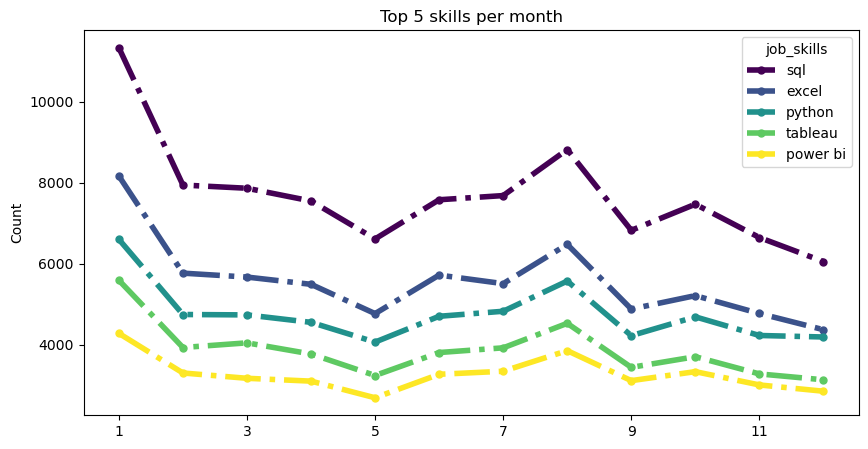

In [19]:
df_DA_pivot.iloc[:, :5].plot(
    kind ='line',
    linewidth =4,
    linestyle = '-.',
    colormap = 'viridis',
    marker ='o',
    markersize = 5,
    figsize = (10,5)
    )
plt.title("Top 5 skills per month")
plt.xlabel("")
plt.ylabel("Count")
plt.show()

In [23]:
df_exploded = df_DA.explode('job_skills')
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary =('salary_year_avg','median')
)

skill_count =20
skill_stats = skill_stats.sort_values(by = 'skill_count', ascending= False).head(skill_count)

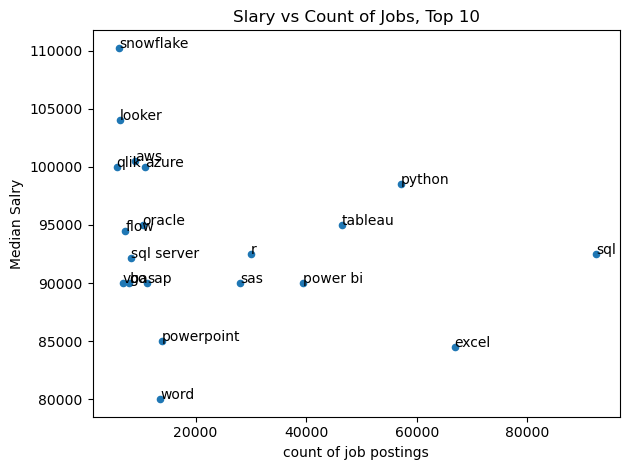

In [24]:
skill_stats.plot(kind= 'scatter', x='skill_count', y='median_salary')
plt.xlabel('count of job postings')
plt.ylabel('Median Salry')
plt.title('Slary vs Count of Jobs, Top 10')
plt.tight_layout()
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)
plt.show()

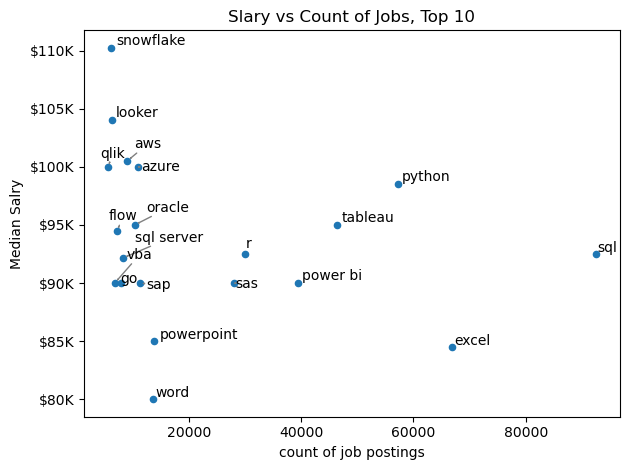

In [33]:
from adjustText import adjust_text

#fig, ax =plt.subplots()

skill_stats.plot(kind= 'scatter', x='skill_count', y='median_salary')

texts=[]
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops =dict(arrowstyle='->', color ='grey', lw =1))
ax =plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.xlabel('count of job postings')
plt.ylabel('Median Salry')
plt.title('Slary vs Count of Jobs, Top 10')
plt.tight_layout()
plt.show()

